In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-retention-case-study-hv-credits/Customer Retention Case Study Data.xlsx


The business team want to get an insight of how the customers can be retained and how the retention rate is dependent on various factors like age of the customer, gross income, number of credit cards among total of six features.
The customer rentention rate is to be gauged from the two activity levels of cx i.e. active to inactive and inactive to active, if more customers are turning from 
active to inactive, and what kind of cx profile are more prone, it can be inferred.

Although, we are more inclined from the business point of view that what kind of cxs became active from inactive state but we can make a sense of the analysis by finding an optimal model as to what percentage of cxs remained attached to the services, product or facility offered by the business doer company or it can be concluded by the finding the cxs profiles which have remained in active state after the finish of the semester, hence we will find the customers who were active at the start of the six months and remained in the active state after six months window also.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

* Importing some basic libraries which might be suitable for performing the **Exploratory Data Analysis (EDA)**. 
> In case, some extra libraries are needed, they will be imported at a required stage.

In [5]:
dd = pd.read_excel('/kaggle/input/customer-retention-case-study-hv-credits/Customer Retention Case Study Data.xlsx', sheet_name = 'Data Dictionary', skiprows = 1)
df = pd.read_excel('/kaggle/input/customer-retention-case-study-hv-credits/Customer Retention Case Study Data.xlsx', sheet_name = 'Data')

# **Data Dictionary** / **Data Definition**

In [6]:
dd

,Unnamed: 0,Variables,Description
0,NaN,gender,Gender of Customer
1,NaN,age,Age of Customer
2,NaN,gross_income,Annual income
3,NaN,segment,Segment as specified by the bank
4,NaN,num_credit_cards,Number of credit cards issued
5,NaN,active_inactive_start,Customer Inactivity Flag at the beginning of t...
6,NaN,active_inactive_end,Customer Inactivity Flag at the end of the per...
7,NaN,num_products,Total number of financial products that the cu...
8,NaN,num_loans,Total number loans disbursed to the customer
9,NaN,duration,Number of days since customer


# **Data Dictionary Preview**

In [7]:
dd.drop(dd.columns[[0]], axis=1, inplace=True)
dd

,Variables,Description
0,gender,Gender of Customer
1,age,Age of Customer
2,gross_income,Annual income
3,segment,Segment as specified by the bank
4,num_credit_cards,Number of credit cards issued
5,active_inactive_start,Customer Inactivity Flag at the beginning of t...
6,active_inactive_end,Customer Inactivity Flag at the end of the per...
7,num_products,Total number of financial products that the cu...
8,num_loans,Total number loans disbursed to the customer
9,duration,Number of days since customer


# **Dataset** (Top 10 Records or rows) Preview

In [8]:
df.head(10)

,gender,age,gross_income,segment,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,duration
0,M,21.0,79070.91,Individuals,0.0,I,0.0,1.0,0.0,1035.0
1,M,23.0,178270.68,College_Graduated,0.0,I,0.0,1.0,0.0,1097.0
2,M,24.0,31243.56,College_Graduated,0.0,I,1.0,1.0,0.0,1866.0
3,M,24.0,130740.54,College_Graduated,0.0,I,0.0,1.0,0.0,1440.0
4,M,31.0,112975.17,Individuals,0.0,I,0.0,0.0,0.0,376.0
5,F,32.0,37318.56,Individuals,0.0,A,1.0,4.0,0.0,699.0
6,F,43.0,131281.50,Individuals,0.0,A,0.0,1.0,0.0,5022.0
7,M,48.0,184641.60,Individuals,0.0,A,1.0,1.0,0.0,4066.0
8,F,36.0,164347.86,VIP,0.0,A,1.0,1.0,0.0,1427.0
9,M,26.0,27311.31,College_Graduated,0.0,I,1.0,1.0,0.0,1458.0


# **Data Health Review**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54030 entries, 0 to 54029
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 54030 non-null  object 
 1   age                    54030 non-null  float64
 2   gross_income           54030 non-null  float64
 3   segment                54030 non-null  object 
 4   num_credit_cards       54030 non-null  float64
 5   active_inactive_start  54030 non-null  object 
 6   active_inactive_end    54030 non-null  float64
 7   num_products           54030 non-null  float64
 8   num_loans              54030 non-null  float64
 9   duration               54030 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [10]:
df.shape

(54030, 10)

# **Some Insights about the rows/records or fetaures/columns**
* There are 10 columns with 54030 records or rows as per inital findings 
* 7 columns are of Float64 Dtype and 3 columns of the Object or string Dtype. 
* The memory used is more than 4100 Kilobytes.
* **active_inactive_end should be of Dtype int64 hence a transformation of datatype is required for this column**

In [11]:
df['active_inactive_start']=df['active_inactive_start'].map({'I': 0, 'A': 1})
df['active_inactive_start'] = df['active_inactive_start'].astype('int64')

## Categorical Columns

In [12]:
cat_data = df.select_dtypes(exclude = ['float64', 'int64'])

for col_name in cat_data.columns:
    print('\n Unique values in Column ', col_name, ' are :  \n', cat_data[col_name].unique())


 Unique values in Column  gender  are :  
 ['M' 'F']

 Unique values in Column  segment  are :  
 ['Individuals' 'College_Graduated' 'VIP']


## Numeric Columns

In [13]:
num_data = df.select_dtypes(exclude = 'object')

for col_name in num_data.columns:
    print('\n Unique values in Column ', col_name, ' are :  \n', num_data[col_name].unique())


 Unique values in Column  age  are :  
 [ 21.  23.  24.  31.  32.  43.  48.  36.  26.  46.  42.  22.  33.  40.
  60.  25.  45.  34.  30.  54.  20.  39.  52.  66.  89.  61.  71.  69.
  53.  18.  44.  70.  72.  27.  64.  28.  73.  57.  38.  78.  68.  56.
  50.  87.  51.  84.  67.  37.  35.  63.  47.  49.  29.  58.  74.  85.
  86.  88.  62.  83.  59.  55.  75.  41.  80.  14.  65.  76.  97.  15.
  82.  77.  98.  81.  90.  91. 104.  11.  93.   2.  99.  79.   6.  13.
  19.  17. 101.  12. 103.  10.  92.  96.  94. 102. 105.   4.  16.   5.
   3.   9.   7. 112.  95.   8. 100. 107. 106. 108. 110. 111.]

 Unique values in Column  gross_income  are :  
 [ 79070.91 178270.68  31243.56 ... 106930.05  65246.79 180678.48]

 Unique values in Column  num_credit_cards  are :  
 [0. 1.]

 Unique values in Column  active_inactive_start  are :  
 [0 1]

 Unique values in Column  active_inactive_end  are :  
 [0. 1.]

 Unique values in Column  num_products  are :  
 [ 1.  0.  4.  2.  7.  3.  5.  6.  9.  8. 1

# Get the count of Missing values in categorical columns

In [14]:
print("Nan or Missing values in each column" , cat_data.isnull().sum(), sep='\n')

Nan or Missing values in each column
gender     0
segment    0
dtype: int64


# Get the count of Zeros in numerical columns


In [15]:
for col_name in num_data.columns:
    column = num_data[col_name]
    count = (column == 0).sum()
    print('Number of zeros in column ', col_name, ' is : ', count)

Number of zeros in column  age  is :  0
Number of zeros in column  gross_income  is :  0
Number of zeros in column  num_credit_cards  is :  51335
Number of zeros in column  active_inactive_start  is :  29026
Number of zeros in column  active_inactive_end  is :  28686
Number of zeros in column  num_products  is :  9573
Number of zeros in column  num_loans  is :  53524
Number of zeros in column  duration  is :  0


# Get the count of Unique values in numerical columns

In [16]:
for col_name in num_data.columns:
    count = df[col_name].nunique()
    print('Number of Unique values in Column ', col_name, ' is : ', count)

Number of Unique values in Column  age  is :  110
Number of Unique values in Column  gross_income  is :  49994
Number of Unique values in Column  num_credit_cards  is :  2
Number of Unique values in Column  active_inactive_start  is :  2
Number of Unique values in Column  active_inactive_end  is :  2
Number of Unique values in Column  num_products  is :  14
Number of Unique values in Column  num_loans  is :  2
Number of Unique values in Column  duration  is :  5677


# Get the count of Missing values in numerical columns

In [17]:
print("Nan or Missing values in each column" , num_data.isnull().sum(), sep='\n')

Nan or Missing values in each column
age                      0
gross_income             0
num_credit_cards         0
active_inactive_start    0
active_inactive_end      0
num_products             0
num_loans                0
duration                 0
dtype: int64


In [18]:
df

,gender,age,gross_income,segment,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,duration
0,M,21.0,79070.91,Individuals,0.0,0,0.0,1.0,0.0,1035.0
1,M,23.0,178270.68,College_Graduated,0.0,0,0.0,1.0,0.0,1097.0
2,M,24.0,31243.56,College_Graduated,0.0,0,1.0,1.0,0.0,1866.0
3,M,24.0,130740.54,College_Graduated,0.0,0,0.0,1.0,0.0,1440.0
4,M,31.0,112975.17,Individuals,0.0,0,0.0,0.0,0.0,376.0
...,...,...,...,...,...,...,...,...,...,...
54025,M,24.0,47237.01,College_Graduated,0.0,0,1.0,1.0,0.0,1147.0
54026,F,46.0,106930.05,Individuals,1.0,1,1.0,8.0,0.0,6061.0
54027,M,24.0,185323.05,College_Graduated,0.0,0,0.0,0.0,0.0,1817.0
54028,F,27.0,65246.79,College_Graduated,0.0,0,0.0,1.0,0.0,1447.0


### Since number of Credit cards, active_inactive_end, number of products & number of loans are integral values, hence they are needed to be converted to integer values

In [19]:
df['num_credit_cards'] = df['num_credit_cards'].astype('int64')
df['active_inactive_end'] = df['active_inactive_end'].astype('int64')
df['num_products'] = df['num_products'].astype('int64')
df['num_loans'] = df['num_loans'].astype('int64')

In [20]:
df

,gender,age,gross_income,segment,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,duration
0,M,21.0,79070.91,Individuals,0,0,0,1,0,1035.0
1,M,23.0,178270.68,College_Graduated,0,0,0,1,0,1097.0
2,M,24.0,31243.56,College_Graduated,0,0,1,1,0,1866.0
3,M,24.0,130740.54,College_Graduated,0,0,0,1,0,1440.0
4,M,31.0,112975.17,Individuals,0,0,0,0,0,376.0
...,...,...,...,...,...,...,...,...,...,...
54025,M,24.0,47237.01,College_Graduated,0,0,1,1,0,1147.0
54026,F,46.0,106930.05,Individuals,1,1,1,8,0,6061.0
54027,M,24.0,185323.05,College_Graduated,0,0,0,0,0,1817.0
54028,F,27.0,65246.79,College_Graduated,0,0,0,1,0,1447.0


## Duplicacy in the records to be checked

In [21]:
dup_data = df[df.duplicated(keep = 'first')]
print("Duplicate Rows :")
dup_data

Duplicate Rows :


,gender,age,gross_income,segment,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,duration
1597,M,60.0,59023.05,Individuals,0,1,1,4,0,5634.0
2374,M,23.0,99158.70,College_Graduated,0,0,0,1,0,1467.0
2555,M,21.0,115759.89,College_Graduated,0,0,1,1,0,1138.0
2684,M,27.0,103297.14,VIP,0,1,1,2,0,411.0
2785,M,25.0,89892.72,College_Graduated,0,0,0,0,0,1736.0
...,...,...,...,...,...,...,...,...,...,...
53933,F,81.0,116055.81,Individuals,0,1,0,2,0,6886.0
53964,M,21.0,79559.49,College_Graduated,0,1,1,1,0,704.0
53980,F,40.0,58703.52,Individuals,0,1,1,2,0,3881.0
53987,M,45.0,78091.35,Individuals,0,0,0,0,0,3457.0


## Total number of duplicate records = 1191, Hence are required to be dropped

In [22]:
df = df.drop_duplicates(keep = 'first' , ignore_index = True)
df

,gender,age,gross_income,segment,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,duration
0,M,21.0,79070.91,Individuals,0,0,0,1,0,1035.0
1,M,23.0,178270.68,College_Graduated,0,0,0,1,0,1097.0
2,M,24.0,31243.56,College_Graduated,0,0,1,1,0,1866.0
3,M,24.0,130740.54,College_Graduated,0,0,0,1,0,1440.0
4,M,31.0,112975.17,Individuals,0,0,0,0,0,376.0
...,...,...,...,...,...,...,...,...,...,...
52834,M,24.0,75405.60,College_Graduated,0,0,0,1,0,1073.0
52835,M,24.0,47237.01,College_Graduated,0,0,1,1,0,1147.0
52836,F,46.0,106930.05,Individuals,1,1,1,8,0,6061.0
52837,F,27.0,65246.79,College_Graduated,0,0,0,1,0,1447.0


# Outlier & Exploratory Data Analysis (Univariate)

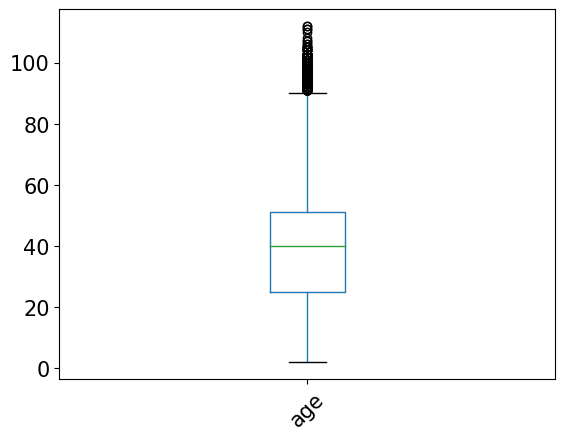

In [23]:
df.boxplot(column=['age'], grid=False, rot=45, fontsize=15);

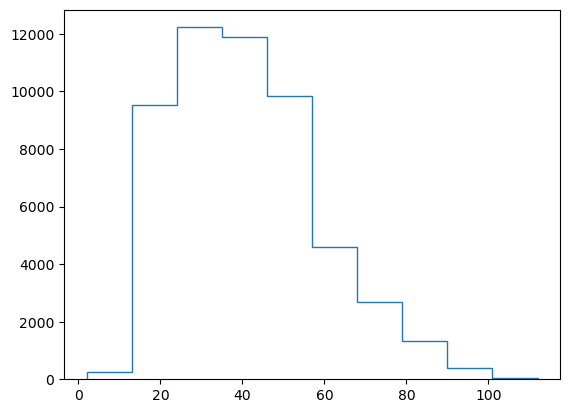

In [24]:
plt.hist(df['age'], histtype='step')
plt.show()

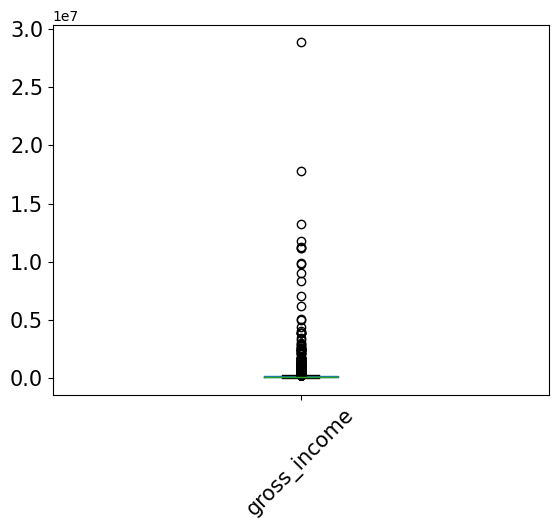

In [25]:
df.boxplot(column=['gross_income'], grid=False, rot=45, fontsize=15);

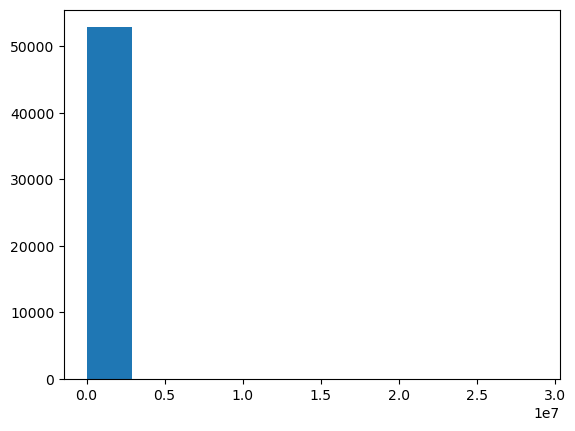

In [26]:
plt.hist(df['gross_income'])
plt.show()

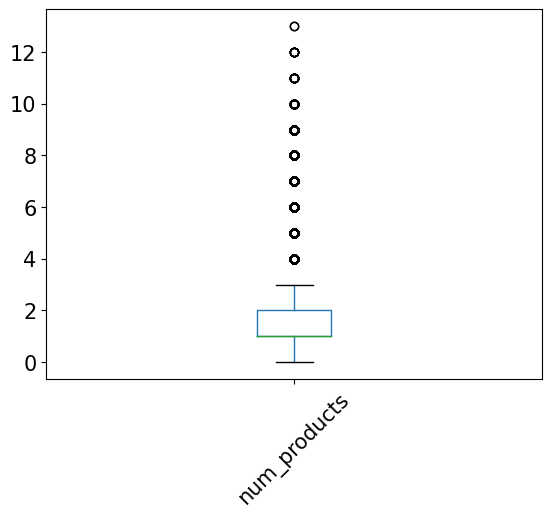

In [27]:
df.boxplot(column=['num_products'], grid=False, rot=45, fontsize=15);

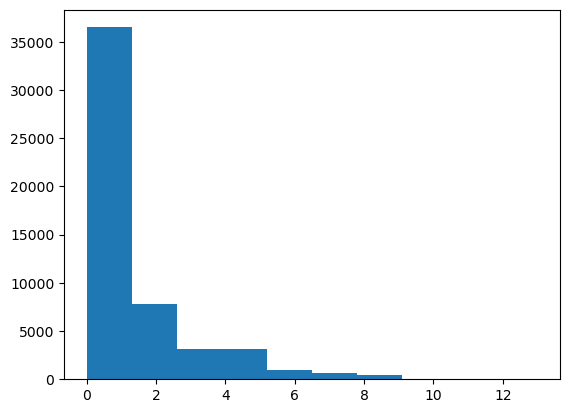

In [28]:
plt.hist(df['num_products'])
plt.show()

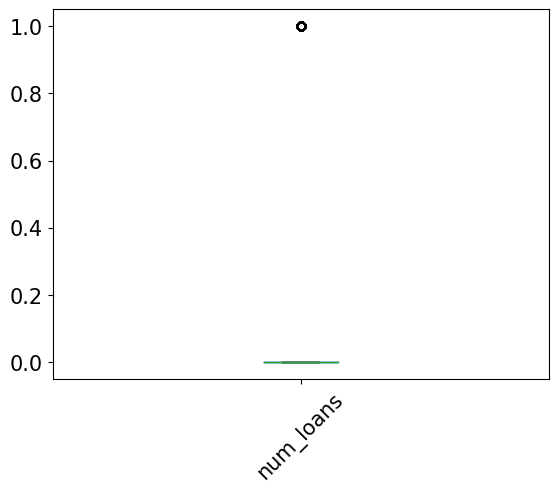

In [29]:
df.boxplot(column=['num_loans'], grid=False, rot=45, fontsize=15);

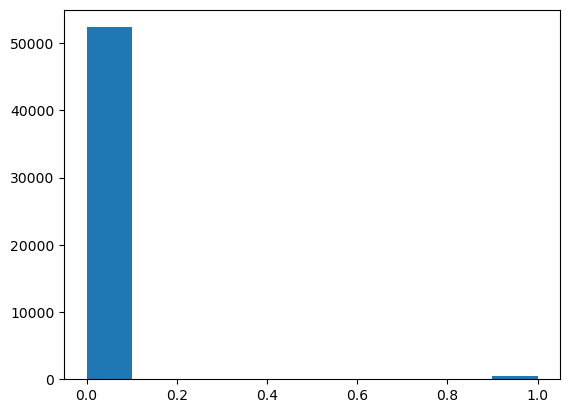

In [30]:
plt.hist(df['num_loans'])
plt.show()

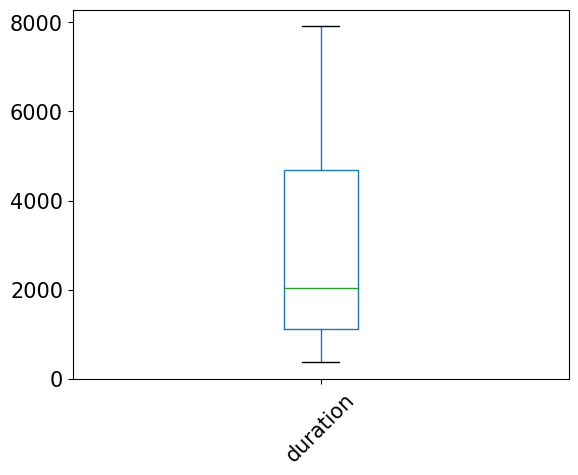

In [31]:
df.boxplot(column=['duration'], grid=False, rot=45, fontsize=15);

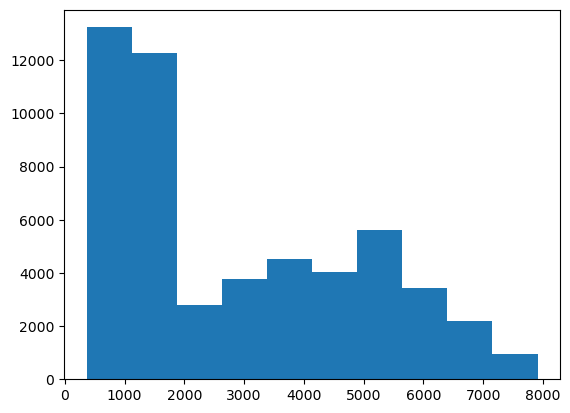

In [32]:
plt.hist(df['duration'])
plt.show()

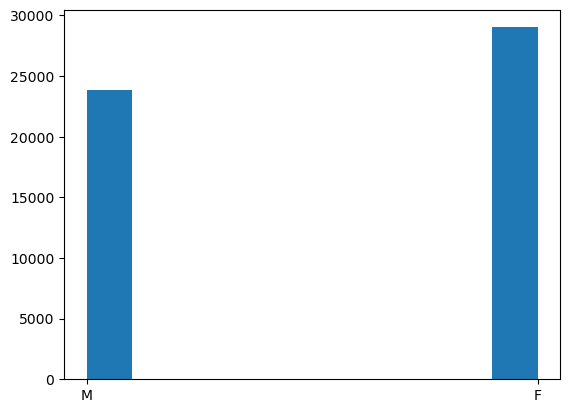

In [33]:
plt.hist(df['gender'])
plt.show()

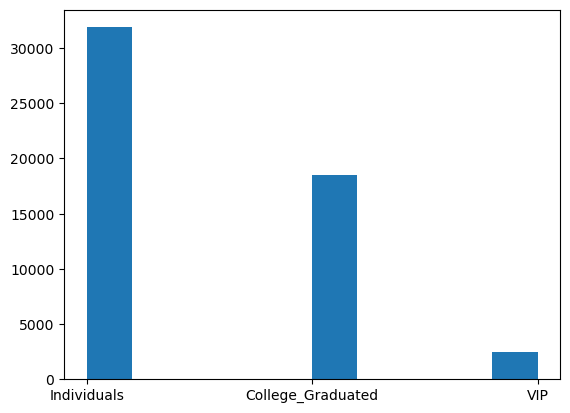

In [34]:
plt.hist(df['segment'])
plt.show()

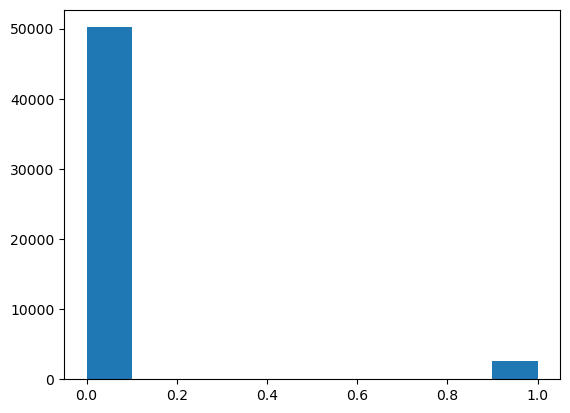

In [35]:
plt.hist(df['num_credit_cards'])
plt.show()

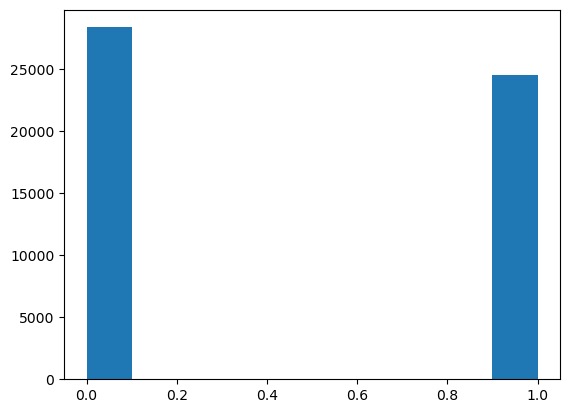

In [36]:
plt.hist(df['active_inactive_start'])
plt.show()

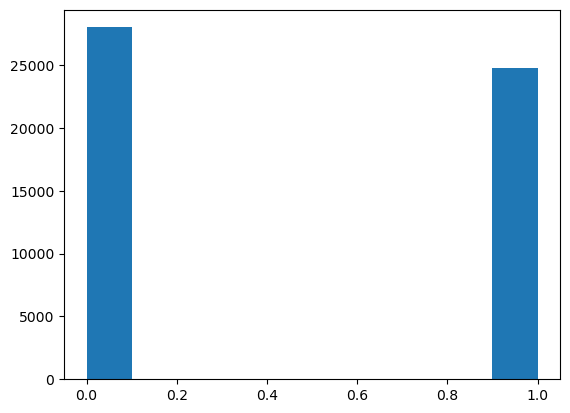

In [37]:
plt.hist(df['active_inactive_end'])
plt.show()

In [38]:
df['ret_cust'] = np.where(((df['active_inactive_start'] == 0 | (df['active_inactive_start'] ==1)) & (df['active_inactive_end'] == 1)), 1, 0)

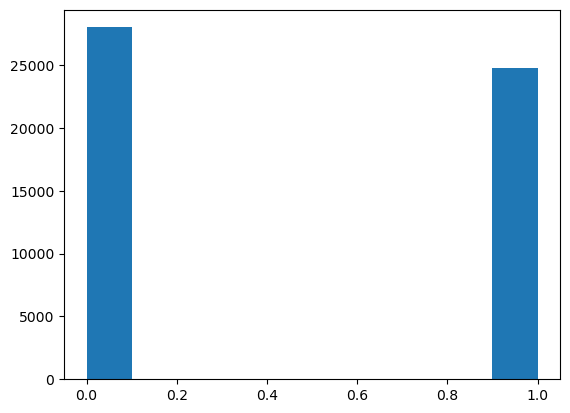

In [39]:
plt.hist(df['ret_cust'])
plt.show()

## Convert all the non-numeric columns to numerical data types

In [40]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

In [41]:
df

,gender,age,gross_income,segment,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,duration,ret_cust
0,1,21.0,79070.91,1,0,0,0,1,0,1035.0,0
1,1,23.0,178270.68,0,0,0,0,1,0,1097.0,0
2,1,24.0,31243.56,0,0,0,1,1,0,1866.0,1
3,1,24.0,130740.54,0,0,0,0,1,0,1440.0,0
4,1,31.0,112975.17,1,0,0,0,0,0,376.0,0
...,...,...,...,...,...,...,...,...,...,...,...
52834,1,24.0,75405.60,0,0,0,0,1,0,1073.0,0
52835,1,24.0,47237.01,0,0,0,1,1,0,1147.0,1
52836,0,46.0,106930.05,1,1,1,1,8,0,6061.0,1
52837,0,27.0,65246.79,0,0,0,0,1,0,1447.0,0


In [42]:
df.describe(include = 'all')

,gender,age,gross_income,segment,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,duration,ret_cust
count,52839.000000,52839.000000,5.283900e+04,52839.000000,52839.000000,52839.000000,52839.000000,52839.000000,52839.000000,52839.000000,52839.000000
mean,0.450690,40.782490,1.342687e+05,0.695585,0.050228,0.463748,0.469634,1.537898,0.009330,2914.713242,0.469634
std,0.497567,17.203393,2.418738e+05,0.550945,0.218417,0.498689,0.499082,1.581192,0.096142,2028.241321,0.499082
min,0.000000,2.000000,2.336010e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,366.000000,0.000000
25%,0.000000,25.000000,6.861658e+04,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1118.000000,0.000000
50%,0.000000,40.000000,1.015898e+05,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2048.000000,0.000000
75%,1.000000,51.000000,1.560876e+05,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,4691.500000,1.000000
max,1.000000,112.000000,2.889440e+07,2.000000,1.000000,1.000000,1.000000,13.000000,1.000000,7909.000000,1.000000


In [43]:
df.describe(include = 'all', percentiles = [0.01, 0.10, 0.25, 0.50, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
gender,52839.0,0.450690,0.497567,0.00,0.0000,0.000,0.000,0.00,1.00,1.000,1.000,1.00
age,52839.0,40.782490,17.203393,2.00,18.0000,22.000,25.000,40.00,51.00,65.000,89.000,112.00
gross_income,52839.0,134268.724109,241873.819689,2336.01,26068.0734,49042.872,68616.585,101589.78,156087.63,234366.978,554819.532,28894395.51
segment,52839.0,0.695585,0.550945,0.00,0.0000,0.000,0.000,1.00,1.00,1.000,2.000,2.00
num_credit_cards,52839.0,0.050228,0.218417,0.00,0.0000,0.000,0.000,0.00,0.00,0.000,1.000,1.00
active_inactive_start,52839.0,0.463748,0.498689,0.00,0.0000,0.000,0.000,0.00,1.00,1.000,1.000,1.00
active_inactive_end,52839.0,0.469634,0.499082,0.00,0.0000,0.000,0.000,0.00,1.00,1.000,1.000,1.00
num_products,52839.0,1.537898,1.581192,0.00,0.0000,0.000,1.000,1.00,2.00,4.000,8.000,13.00
num_loans,52839.0,0.009330,0.096142,0.00,0.0000,0.000,0.000,0.00,0.00,0.000,0.000,1.00
duration,52839.0,2914.713242,2028.241321,366.00,397.0000,713.000,1118.000,2048.00,4691.50,5844.000,7432.000,7909.00


In [44]:
df

,gender,age,gross_income,segment,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,duration,ret_cust
0,1,21.0,79070.91,1,0,0,0,1,0,1035.0,0
1,1,23.0,178270.68,0,0,0,0,1,0,1097.0,0
2,1,24.0,31243.56,0,0,0,1,1,0,1866.0,1
3,1,24.0,130740.54,0,0,0,0,1,0,1440.0,0
4,1,31.0,112975.17,1,0,0,0,0,0,376.0,0
...,...,...,...,...,...,...,...,...,...,...,...
52834,1,24.0,75405.60,0,0,0,0,1,0,1073.0,0
52835,1,24.0,47237.01,0,0,0,1,1,0,1147.0,1
52836,0,46.0,106930.05,1,1,1,1,8,0,6061.0,1
52837,0,27.0,65246.79,0,0,0,0,1,0,1447.0,0


# Outliers are present in the following columns
* Age
* Duration
* gross_income
* num_products

## There are no identifier variables. Hence we have nothing to ignore for Univariate Analysis

 # Exploratory Data Analysis (Bivariate)

## There are 11 variables **NOW**, hence the total number of Bivariate relationships to explore are 55.

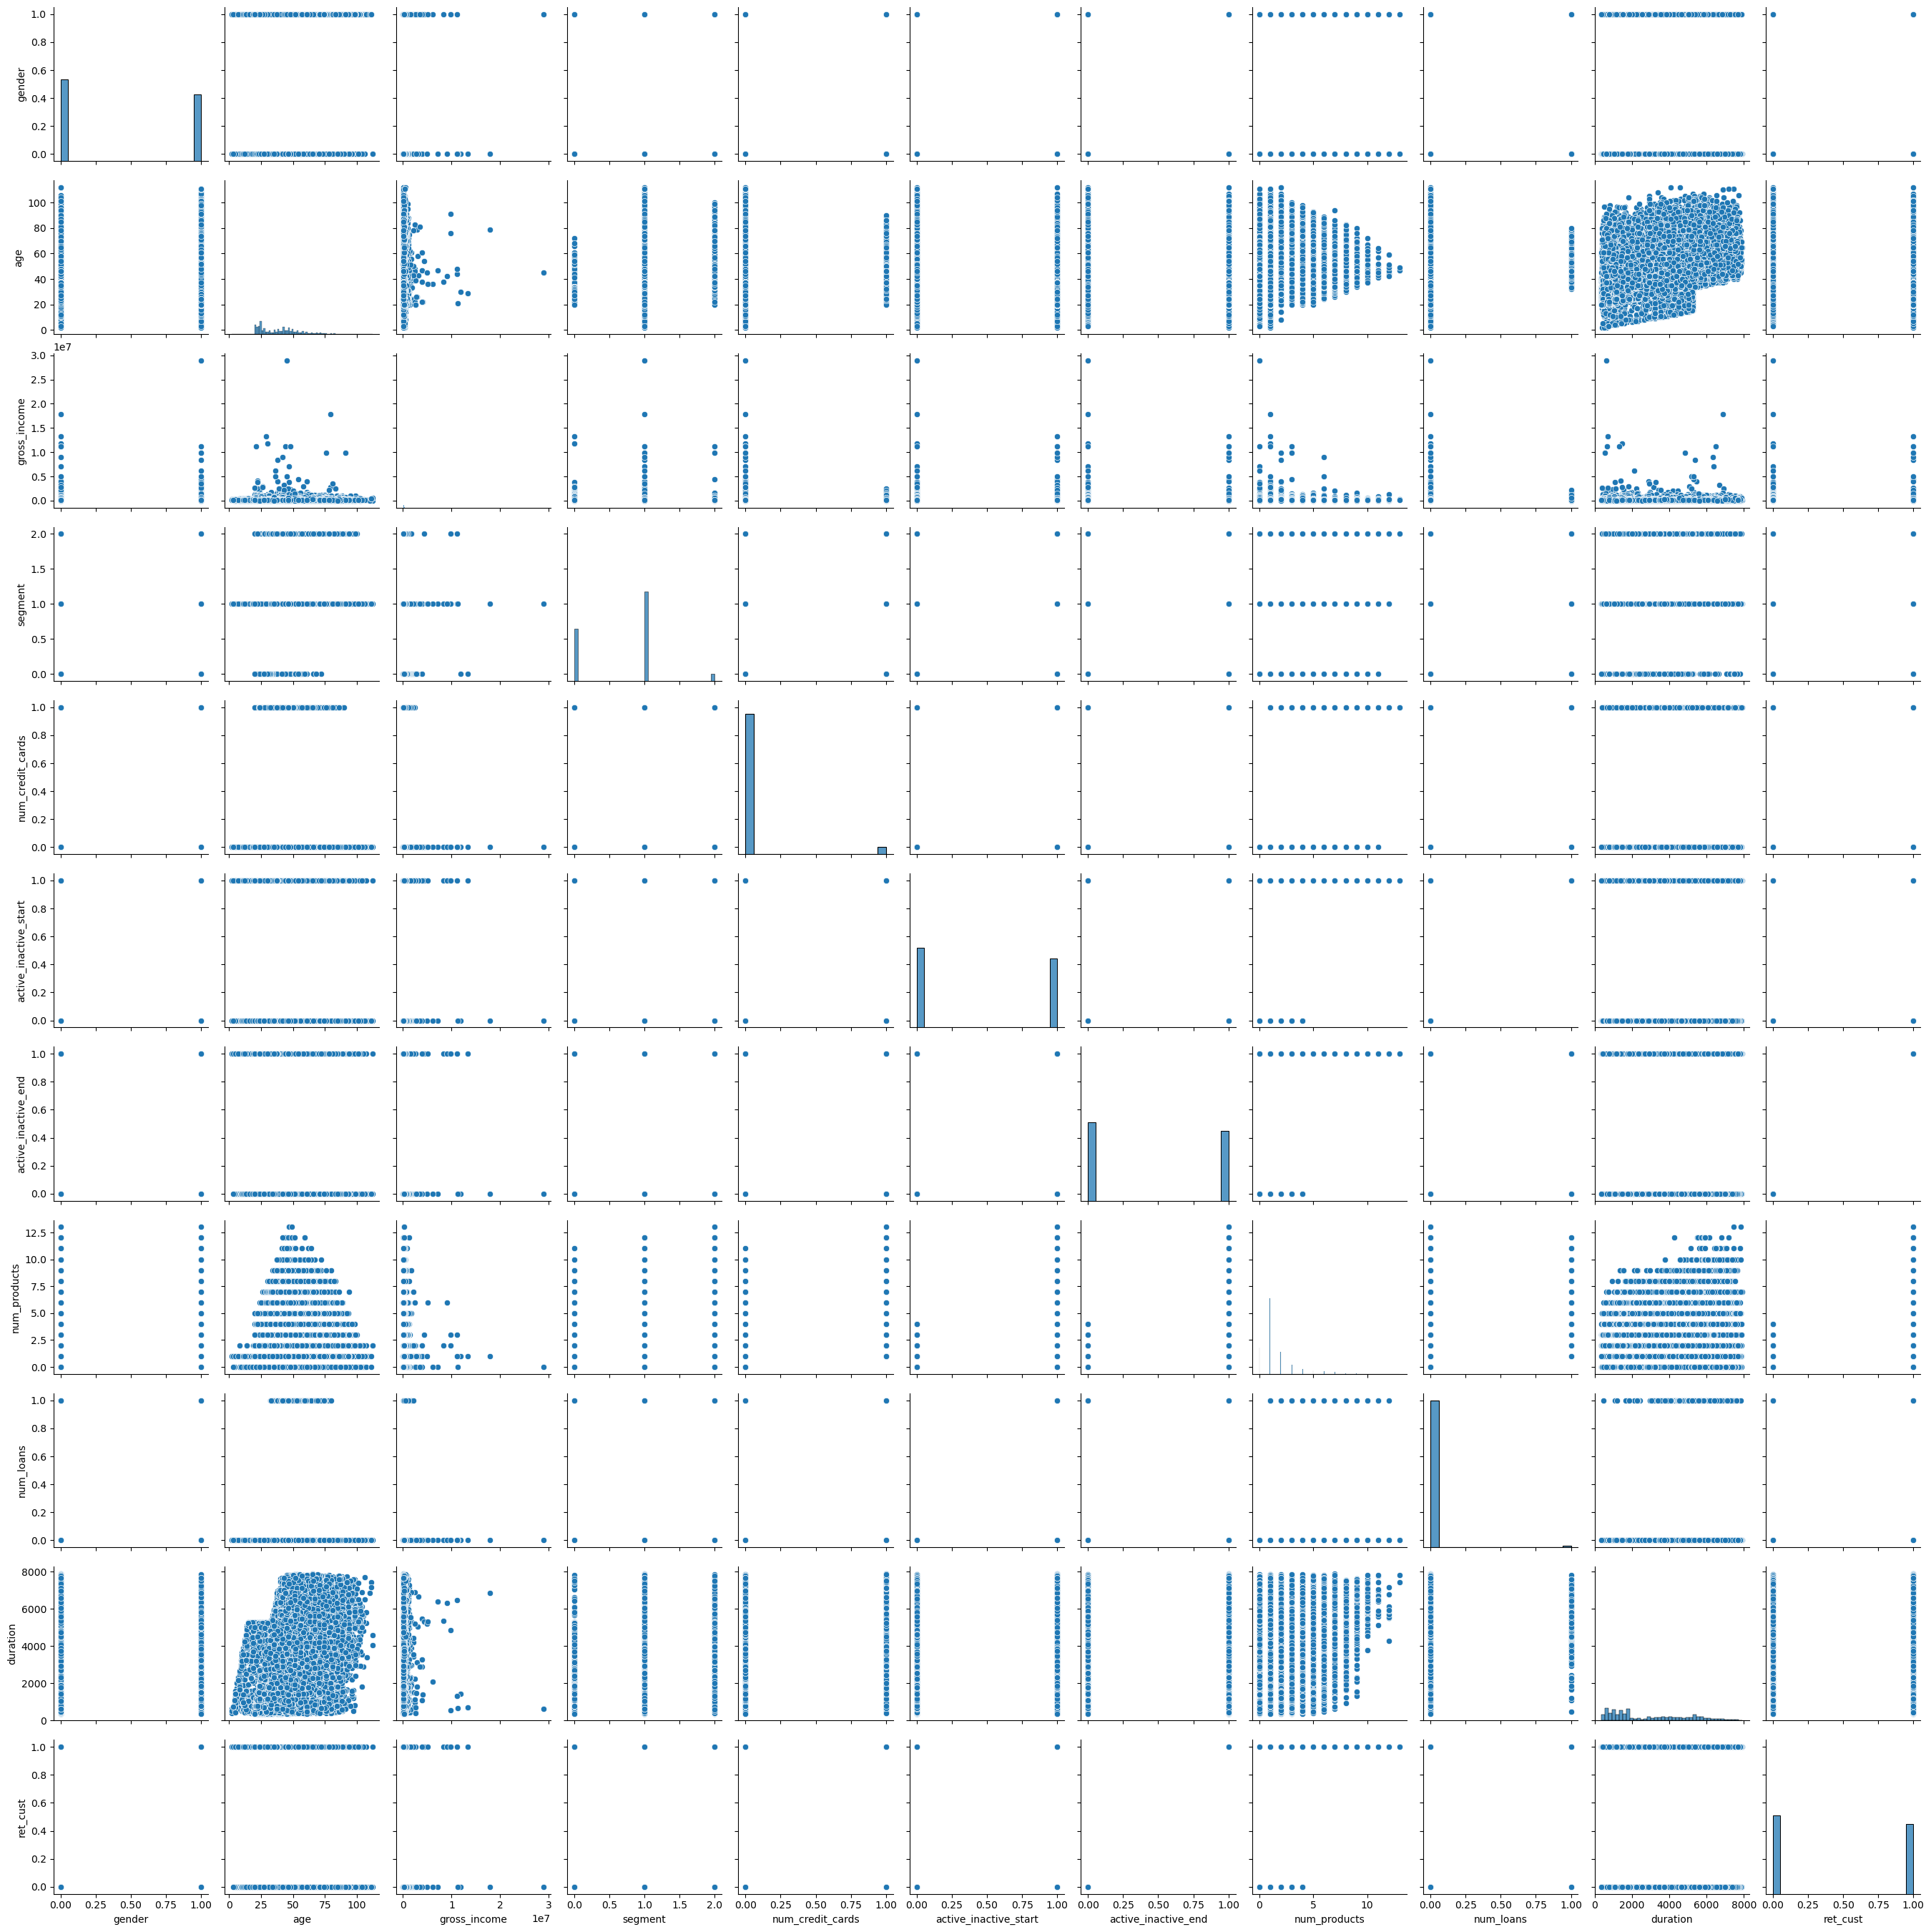

In [45]:
import seaborn as sns
sns.pairplot(data = df);

# KPI/ Metric based questions

> 1. What % of customers were active before the 6 months period. What was this % at the
end of 6 months period?

In [46]:
# This can be inferenced by summing up all the 1s and divided by count of all the 0s and 1s 
a = df["active_inactive_start"].sum()*100
b = df["active_inactive_start"].count()
c = a/b
d = str(c)
print(d + "%")

46.37483676829614%


In [47]:
# This can be inferenced by summing up all the 1s and divided by count of all the 0s and 1s 
a1 = df["active_inactive_end"].sum()*100
b1 = df["active_inactive_end"].count()
c1 = a1/b1
d1 = str(c1)
print(d1 + "%")

46.96341717292152%


# About 46% customers were active at the start and approx. 47% customers remained active at the end of the observation period

> 2. Get the count of below customers:
I. Customers who remained active
II. Customers who remained inactive
III. Active customers who became inactive
IV. Inactive customers who became active
> 3. For the Four types of customers identified above, perform a comparison on the below
metrics and report any significant difference
I. Average of gross income
II. Average of age
III. Average of duration
IV. Average of num_credit_cards
V. Average of num_loans

In [69]:
t = 0
gross_incm = 0
total_age = 0
total_duration = 0
total_num_credit_cards = 0
total_num_of_loans = 0
for i in range(0,52839):
    if (df['active_inactive_start'][i] == 1) & (df['active_inactive_end'][i] == 1):
        t = t+1
        gross_incm += df['gross_income'][i]
        total_age += df['age'][i]
        total_duration += df['duration'][i]
        total_num_credit_cards += df['num_credit_cards'][i]
        total_num_of_loans += df['num_loans'][i]
    else:
        continue
print('The customers that remained active at of both start and end:', t)
print(f'The average gross income for the active customers is: {(gross_incm)/t}')
print(f'The average age for the active customers is: {(total_age)/t}')
print(f'The average duration for the active customers is: {(total_duration)/t}')
print(f'The average number of credit cards for the active customers is: {(total_num_credit_cards)/t}')
print(f'The average number of loans for the active customers is: {(total_num_of_loans)/t}')

The customers that remained active at of both start and end: 22436
The average gross income for the active customers is: 142452.9062003022
The average age for the active customers is: 43.660857550365485
The average duration for the active customers is: 3305.692904261009
The average number of credit cards for the active customers is: 0.11740060616865751
The average number of loans for the active customers is: 0.02090390443929399


In [70]:
u = 0
gross_incm_1 = 0
total_age_1 = 0
total_duration_1 = 0
total_num_credit_cards_1 = 0
total_num_of_loans_1 = 0
for j in range(0,52839):
    if (df['active_inactive_start'][j] == 0) & (df['active_inactive_end'][j] == 0):
        u = u+1
        gross_incm_1 += df['gross_income'][j]
        total_age_1 += df['age'][j]
        total_duration_1 += df['duration'][j]
        total_num_credit_cards_1 += df['num_credit_cards'][j]
        total_num_of_loans_1 += df['num_loans'][j]
    else:
        continue
print('The customers that remained inactive at of both start and end:', u)
print(f'The average gross income for the active customers is: {(gross_incm_1)/u}')
print(f'The average age for the active customers is: {(total_age_1)/u}')
print(f'The average duration for the active customers is: {(total_duration_1)/u}')
print(f'The average number of credit cards for the active customers is: {(total_num_credit_cards_1)/u}')
print(f'The average number of loans for the active customers is: {(total_num_of_loans_1)/u}')

The customers that remained inactive at of both start and end: 25956
The average gross income for the active customers is: 128342.33828247756
The average age for the active customers is: 38.085799044536905
The average duration for the active customers is: 2561.1246725227306
The average number of credit cards for the active customers is: 7.705347511172754e-05
The average number of loans for the active customers is: 0.0


In [71]:
v = 0
gross_incm_2 = 0
total_age_2 = 0
total_duration_2 = 0
total_num_credit_cards_2 = 0
total_num_of_loans_2 = 0
for k in range(0,52839):
    if (df['active_inactive_start'][k] == 1) & (df['active_inactive_end'][k] == 0):
        v = v+1
        gross_incm_2 += df['gross_income'][k]
        total_age_2 += df['age'][k]
        total_duration_2 += df['duration'][k]
        total_num_credit_cards_2 += df['num_credit_cards'][k]
        total_num_of_loans_2 += df['num_loans'][k]
    else:
        continue
print('The customers that were active at start but became inactive at end:', v)
print(f'The average gross income for the active customers is: {(gross_incm_2)/v}')
print(f'The average age for the active customers is: {(total_age_2)/v}')
print(f'The average duration for the active customers is: {(total_duration_2)/v}')
print(f'The average number of credit cards for the active customers is: {(total_num_credit_cards_2)/v}')
print(f'The average number of loans for the active customers is: {(total_num_of_loans_2)/v}')

The customers that were active at start but became inactive at end: 2068
The average gross income for the active customers is: 132812.36010638284
The average age for the active customers is: 44.648452611218566
The average duration for the active customers is: 3417.948742746615
The average number of credit cards for the active customers is: 0.006769825918762089
The average number of loans for the active customers is: 0.01160541586073501


In [72]:
w = 0
gross_incm_3 = 0
total_age_3 = 0
total_duration_3 = 0
total_num_credit_cards_3 = 0
total_num_of_loans_3 = 0
for n in range(0,52839):
    if (df['active_inactive_start'][n] == 0) & (df['active_inactive_end'][n] == 1):
        w = w+1
        gross_incm_3 += df['gross_income'][n]
        total_age_3 += df['age'][n]
        total_duration_3 += df['duration'][n]
        total_num_credit_cards_3 += df['num_credit_cards'][n]
        total_num_of_loans_3 += df['num_loans'][n]
    else:
        continue
print('The customers that were inactive at start but became active at the end:', w)
print(f'The average gross income for the active customers is: {(gross_incm_3)/w}')
print(f'The average age for the active customers is: {(total_age_3)/w}')
print(f'The average duration for the active customers is: {(total_duration_3)/w}')
print(f'The average number of credit cards for the active customers is: {(total_num_credit_cards_3)/w}')
print(f'The average number of loans for the active customers is: {(total_num_of_loans_3)/w}')

The customers that were inactive at start but became active at the end: 2379
The average gross income for the active customers is: 123010.51557377065
The average age for the active customers is: 39.698612862547286
The average duration for the active customers is: 2647.808743169399
The average number of credit cards for the active customers is: 0.0016813787305590584
The average number of loans for the active customers is: 0.0


1. As per the analysis, When the customers shuffle from Inactive state to active or vice versa: there is not that much considerable change in absolute when compared to whole set of customers but if the state remains the same: there is not considerable difference in absolute terms but when the shuffling and no shuffling process are compared, there is a considerable between the two processes almost one tenth times.
2. Average Gross Income for the retained customers is largest while the customers who jumped from inactive to active state is smallest. Also, the Acrive to inactive, inactive to inactive and inactive to inactive state are somewhat comparable so it can be said that customers with good average gross income are more likely to be retained.
3. As per the analysis the inactive customers are younger on an average but the who started at active state are older, so it can said older people are more likely to be retained.
4. Avergae Number of credit cards with inactive customers are very large as compared to other categories and hence they are needed to be contacted to improve the issuance of credit cards.
5. Number of loans required by active customers is considerable on an average.

> 4. For Female and Male customers, perform a similar comparison on the below metrics and
report any significant difference:
I. Average of gross income
II. Average of age
III. Average of duration
IV. Average of num_credit_cards
V. Average of num_loans


In [73]:
male = 0
female = 0
gross_incm_4 = 0
total_age_4 = 0
total_duration_4 = 0
total_num_credit_cards_4 = 0
total_num_of_loans_4 = 0
gross_incm_5 = 0
total_age_5 = 0
total_duration_5 = 0
total_num_credit_cards_5 = 0
total_num_of_loans_5 = 0
for a in range(0,52839):
    if (df['gender'][a] == 0):
        male += 1
        gross_incm_4 += df['gross_income'][a]
        total_age_4 += df['age'][a]
        total_duration_4 += df['duration'][a]
        total_num_credit_cards_4 += df['num_credit_cards'][a]
        total_num_of_loans_4 += df['num_loans'][a]
    else:
        female += 1
        gross_incm_5 += df['gross_income'][a]
        total_age_5 += df['age'][a]
        total_duration_5 += df['duration'][a]
        total_num_credit_cards_5 += df['num_credit_cards'][a]
        total_num_of_loans_5 += df['num_loans'][a]
print('The customers that were male:', male)
print(f'The average gross income for the male customers is: {(gross_incm_4)/male}')
print(f'The average age for the male customers is: {(total_age_4)/male}')
print(f'The average duration for the male customers is: {(total_duration_4)/male}')
print(f'The average number of credit cards for the male customers is: {(total_num_credit_cards_4)/male}')
print(f'The average number of loans for the male customers is: {(total_num_of_loans_4)/male}')
print('-----------------------------------------------------------------')
print('The customers that were female:', female)
print(f'The average gross income for the female customers is: {(gross_incm_5)/female}')
print(f'The average age for the female customers is: {(total_age_5)/female}')
print(f'The average duration for the female customers is: {(total_duration_5)/female}')
print(f'The average number of credit cards for the female customers is: {(total_num_credit_cards_5)/female}')
print(f'The average number of loans for the female customers is: {(total_num_of_loans_5)/female}')

The customers that were male: 29025
The average gross income for the male customers is: 135535.55576020645
The average age for the male customers is: 42.70294573643411
The average duration for the male customers is: 3187.146942291128
The average number of credit cards for the male customers is: 0.059328165374677
The average number of loans for the male customers is: 0.012161929371231697
-----------------------------------------------------------------
The customers that were female: 23814
The average gross income for the female customers is: 132724.6832653053
The average age for the female customers is: 38.44179894179894
The average duration for the female customers is: 2582.665364911397
The average number of credit cards for the female customers is: 0.03913664231124549
The average number of loans for the female customers is: 0.005878894767783657


1. Male customers are leading from Female customers on all parameters on an average

> 5. For customers of different segments (College, Individual,…), perform a similar
comparison on the below metrics and report any significant difference:
VI. Average of gross income
VII. Average of age
VIII. Average of duration
IX. Average of num_credit_cards
X. Average of num_loans


In [75]:
college = 0
individual = 0
vip = 0
gross_incm_6 = 0
total_age_6 = 0
total_duration_6 = 0
total_num_credit_cards_6 = 0
total_num_of_loans_6 = 0
gross_incm_7 = 0
total_age_7 = 0
total_duration_7 = 0
total_num_credit_cards_7 = 0
total_num_of_loans_7 = 0
gross_incm_8 = 0
total_age_8 = 0
total_duration_8 = 0
total_num_credit_cards_8 = 0
total_num_of_loans_8 = 0
for g in range(0,52839):
    if (df['segment'][g] == 0):
        college += 1
        gross_incm_6 += df['gross_income'][g]
        total_age_6 += df['age'][g]
        total_duration_6 += df['duration'][g]
        total_num_credit_cards_6 += df['num_credit_cards'][g]
        total_num_of_loans_6 += df['num_loans'][g]
    elif (df['segment'][g] == 1):
        individual += 1
        gross_incm_7 += df['gross_income'][g]
        total_age_7 += df['age'][g]
        total_duration_7 += df['duration'][g]
        total_num_credit_cards_7 += df['num_credit_cards'][g]
        total_num_of_loans_7 += df['num_loans'][g]
    else:
        vip += 1
        gross_incm_8 += df['gross_income'][g]
        total_age_8 += df['age'][g]
        total_duration_8 += df['duration'][g]
        total_num_credit_cards_8 += df['num_credit_cards'][g]
        total_num_of_loans_8 += df['num_loans'][g]
print('The customers that were college graduate:', college)
print(f'The average gross income for the college graduate customers is: {(gross_incm_6)/college}')
print(f'The average age for the college graduate customers is: {(total_age_6)/college}')
print(f'The average duration for the college graduate customers is: {(total_duration_6)/college}')
print(f'The average number of credit cards for the college graduate customers is: {(total_num_credit_cards_6)/college}')
print(f'The average number of loans for the college graduate customers is: {(total_num_of_loans_6)/college}')
print('-----------------------------------------------------------------')
print('The customers that were Individual:', individual)
print(f'The average gross income for the Individual customers is: {(gross_incm_7)/individual}')
print(f'The average age for the Individual customers is: {(total_age_7)/individual}')
print(f'The average duration for the Individual customers is: {(total_duration_7)/individual}')
print(f'The average number of credit cards for the Individual customers is: {(total_num_credit_cards_7)/individual}')
print(f'The average number of loans for the Individual customers is: {(total_num_of_loans_7)/individual}')
print('-----------------------------------------------------------------')
print('The customers that were VIP:', vip)
print(f'The average gross income for the VIP customers is: {(gross_incm_8)/vip}')
print(f'The average age for the VIP customers is: {(total_age_8)/vip}')
print(f'The average duration for the VIP customers is: {(total_duration_8)/vip}')
print(f'The average number of credit cards for the VIP customers is: {(total_num_credit_cards_8)/vip}')
print(f'The average number of loans for the VIP customers is: {(total_num_of_loans_8)/vip}')

The customers that were college graduate: 18510
The average gross income for the college graduate customers is: 115790.89489140989
The average age for the college graduate customers is: 24.40783360345759
The average duration for the college graduate customers is: 1260.5647217720152
The average number of credit cards for the college graduate customers is: 0.007671528903295516
The average number of loans for the college graduate customers is: 0.00016207455429497568
-----------------------------------------------------------------
The customers that were Individual: 31904
The average gross income for the Individual customers is: 141498.59118825127
The average age for the Individual customers is: 49.1689129889669
The average duration for the Individual customers is: 3756.4812249247743
The average number of credit cards for the Individual customers is: 0.0628134403209629
The average number of loans for the Individual customers is: 0.013477933801404213
---------------------------------------

1. There are more individual customers with distant second as College graduate
2. VIP have more average income followed by Individuals
3. Average age of college graduates is very less when compared to VIPs
4. Graduates are most volatile customers when it comes to duration at which they were customers but VIP customers are customers for more time
5. Average Number of credit cards are high for VIPs and hence they are more prone to buy the credit cards
6. College graduates and invidual are less confident to take the loans when compared to VIPs

> 6. For each of the segments (College, Individual,…), find out the % of customers who:
I. Who remained active
II. Who remained inactive
III. Who became inactive
IV. Who became active

In [85]:
b = 0
c = 0
d = 0
e = 0
for s in range(0, 52829):
    if ((df['active_inactive_start'][s] == 1) & (df['active_inactive_end'][s] == 1)) & (df['segment'][s] == 0):
        b +=1
    elif ((df['active_inactive_start'][s] == 1) & (df['active_inactive_end'][s] == 0)) & (df['segment'][s] == 0):
        c+=1
    elif ((df['active_inactive_start'][s] == 0) & (df['active_inactive_end'][s] == 1)) & (df['segment'][s] == 0):
        d+=1
    else:
        e+=1
print(f'College graduates who remained active at start and the end were of percentage: {(b/52829)*100}')
print(f'College graduates who remained active at start and inactive at the end were of percentage: {(c/52829)*100}')
print(f'College graduates who remained inactive at start and active at the end were of percentage: {(d/52829)*100}')
print(f'College graduates who remained inactive at start and inactive at the end were of percentage: {(e/52829)*100}')

College graduates who remained active at start and the end were of percentage: 8.745196766927256
College graduates who remained active at start and inactive at the end were of percentage: 1.0240587556077156
College graduates who remained inactive at start and active at the end were of percentage: 1.775539949648867
College graduates who remained inactive at start and inactive at the end were of percentage: 88.45520452781616


In [91]:
b = 0
c = 0
d = 0
e = 0
for s in range(0, 52829):
    if ((df['active_inactive_start'][s] == 1) & (df['active_inactive_end'][s] == 1)) & (df['segment'][s] == 1):
        b +=1
    elif ((df['active_inactive_start'][s] == 1) & (df['active_inactive_end'][s] == 0)) & (df['segment'][s] == 1):
        c+=1
    elif ((df['active_inactive_start'][s] == 0) & (df['active_inactive_end'][s] == 1)) & (df['segment'][s] == 1):
        d+=1
    else:
        e+=1
print(f'Individuals who remained active at start and the end were of percentage: {(b/52829)*100}')
print(f'Individuals who remained active at start and inactive at the end were of percentage: {(c/52829)*100}')
print(f'Individuals who remained inactive at start and active at the end were of percentage: {(d/52829)*100}')
print(f'Individuals who remained inactive at start and inactive at the end were of percentage: {(e/52829)*100}')

Individuals who remained active at start and the end were of percentage: 29.192299683885743
Individuals who remained active at start and inactive at the end were of percentage: 2.8298851009862007
Individuals who remained inactive at start and active at the end were of percentage: 2.721989816199436
Individuals who remained inactive at start and inactive at the end were of percentage: 65.25582539892862


In [90]:
b = 0
c = 0
d = 0
e = 0
for s in range(0, 52829):
    if ((df['active_inactive_start'][s] == 1) & (df['active_inactive_end'][s] == 1)) & (df['segment'][s] == 2):
        b +=1
    elif ((df['active_inactive_start'][s] == 1) & (df['active_inactive_end'][s] == 0)) & (df['segment'][s] == 2):
        c+=1
    elif ((df['active_inactive_start'][s] == 0) & (df['active_inactive_end'][s] == 1)) & (df['segment'][s] == 2):
        d+=1
    else:
        e+=1
print(f'VIP who remained active at start and inactive at the end were of percentage: {(c/52829)*100}')
print(f'VIP who remained inactive at start and active at the end were of percentage: {(d/52829)*100}')
print(f'VIP who remained inactive at start and inactive at the end were of percentage: {(e/52829)*100}')

VIP who remained active at start and inactive at the end were of percentage: 0.05867989172613526
VIP who remained inactive at start and active at the end were of percentage: 0.003785799466202275
VIP who remained inactive at start and inactive at the end were of percentage: 95.41161104696285


1. Huge percentage of the college graduates could not be moved to activated state.
2. Individuals were not able to be re-ignited the passion to become activated.
3. Most of the VIPs remained in inactivated state.

Section 05: Open-ended questions and recommendations – These are business-oriented
questions which do not tell much about the kind of expected outcome, rather they require you
to check if a certain phenomenon is occurring or not, or whether there is plausibility of a certain
pattern. Often these questions need to be asked on your own and to answer them one needs to
think through in terms of: ‘what kind of output is expected’, ‘how to get it – which variables and
by doing what’ and ‘whether the achieved outcome helps answer the question’. Since this can be
iterative, it requires a lot of brainstorming and asking the right questions (as per the business
objective). Examples (with reference to the campaign data covered in lectures):
● Does the previous campaign have any impact on customers?
● Did mode of contact have a different effect on conversion?
● Did more contacts result in a higher conversion?
1. In future which of the customer segments (college, individual, VIP) can be expected to
remain active compared to others?
2. In future which of the customer segments (college, individual, VIP) can be expected to
remain inactive compared to others?
3. In future, which of the customer segments (college, individual, VIP) can be expected to
become inactive compared to others?
4. Which of Male/Female customers are more stable and do not change their
activity/inactivity level much?
5. Which of Male/Female customers are more volatile and change their activity/inactivity
level?
6. What impact does Income have on customer activity/ inactivity?
7. What impact does Age have on customer activity/ inactivity?
8. What impact does Duration has on customer activity/ inactivity